<a href="https://colab.research.google.com/github/rsomou/CS-Projects/blob/main/files/1_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE 508 HW 1 Part 1: Gradient Descent

Your task in this Colab notebook is to fill out the sections that are specified by **TODO** (please search the keyword `TODO` to make sure you do not miss any).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use(['ggplot'])

## Gradient Descent for Linear Regression

Given two vectors, X and Y, that represent the input and output values of a linear relationship, we can fit a line to this data to predict the output for other values of X. This can be done by finding the parameters $w$ and $b$ of the line, such that the line minimizes the squared error between the predicted and actual output values.

The equation for the line is:

\begin{equation}
\hat{y} = w \cdot x + b
\end{equation}

where:

* $\hat{y}$ is the predicted output value.
* $w$ is the slope
* $b$ is the intercept

Let's use Gradient Descent to find the best values for $\theta$ as defined below:

\begin{equation}
\theta = \begin{bmatrix} w \\ b\end{bmatrix} \end{equation}


## Create Data

Let's generate some data with:

\begin{equation} \theta = \begin{bmatrix} 2 \\ 3 \end{bmatrix} \end{equation}

We will use this data to fit the line and then use it to predict the output for other values of $x$.
*   `number_of_samples` is an integer variable
*   X is a vector of `number_of_samples` numbers between 1, 100
*   Y is a vector of `number_of_samples` numbers where each $y = w \cdot x + b$ plus some noise, which is a random value between 0 and 1.


In [2]:
number_of_samples = 100

X = 2 * np.random.rand(number_of_samples, 1)
y = 2 * X + np.random.rand(number_of_samples, 1) + 3

theta_guess = np.array([[1.0], [1.0]])
learning_rate = 0.001
num_iterations = 500

final_cost = {}
final_theta = {}

Plot and visualize your data.

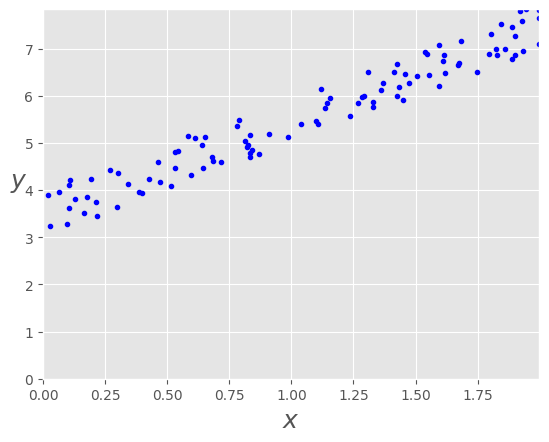

In [61]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ = plt.axis([0,np.max(X),0,np.max(y)])

## Gradient Descent Implementation

The equation for calculating cost function and gradients are as shown below.

Make prediction:

\begin{equation}
\hat{y} =w \cdot x + b
\end{equation}

Mean squared error:

\begin{equation}
J(w, b) = \text{MSE}(w, b) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \frac{1}{n} \sum_{i=1}^n (e_i)^2
\end{equation}

where residual error is
\begin{equation}
e_i=\hat{y}_i - y_i
\end{equation}

Gradient:

\begin{equation}
\nabla J(w, b) = \left( \frac{\partial J}{\partial w}, \frac{\partial J}{\partial b} \right)
\end{equation}

Apply chain rule:

\begin{equation}
\nabla J(w, b) = \left( \sum_{i=1}^n \frac{\partial J}{\partial e_i} \cdot \frac{\partial e_i}{\partial w}, \sum_{i=1}^n \frac{\partial J}{\partial e_i} \cdot \frac{\partial e_i}{\partial b} \right)
= \left( \frac{2}{n} \sum_{i=1}^n e_i \cdot x_i, \frac{2}{n} \sum_{i=1}^n e_i \right)
\end{equation}

Replace $e_i$:

\begin{equation}
\nabla J(w, b) = \left( \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \times {x}_i, \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \times 1 \right)
\end{equation}

### **TODO 1:**
If we define the residual error as $(y_i - \hat{y}_i)$, will the gradient equation $\nabla J(w, b)$ change? Show your derivation.

Your answer:



if $e_i^{new} = (y_i - \hat{y}_i)$, then the new MSE loss is defined as
\begin{equation}
J^{new}(w, b) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^n (e_i^{new})^2 = \frac{1}{n} \sum_{i=1}^n (-e_i)^2 = \frac{1}{n} \sum_{i=1}^n (e_i)^2
\end{equation}
which means $J^{new}(w, b) = J(w, b)$  for all w and b. This implies the gradient is conserved across the negative sign of the residual.

### **TODO 1 & 2:**

Implement the following helper functions in the skeleton code below:

1.  `calculate_prediction_residuals(theta, X, y)`: Calculate the predictions ($X \cdot \theta$) and the residuals (predictions - y).
2.  `calculate_cost(theta, X, y)`: Calculate the Mean Squared Error (MSE) cost: $J(\theta) = \frac{1}{m} \sum (h_\theta(x^{(i)}) - y^{(i)})^2$.
3.  `calculate_gradient(X, residuals)`: Calculate the gradient of the cost function: $\nabla J(\theta) = \frac{2}{m} X^T \cdot (X \theta - y)$.

Follow the comments in the skeleton cell.

In [4]:
# Skeleton for TODO 1 & 2
def calculate_prediction_residuals(theta, X, y):
    """
    Calculate the predictions and residuals.

    Parameters:
    - theta (numpy.ndarray): Parameter vector of shape (num_features,).
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
    - y (numpy.ndarray): Target values of shape (num_samples,).

    Returns:
    - predictions (numpy.ndarray): X * theta
    - residuals (numpy.ndarray): predictions - y
    """
    # 1. Compute predictions
    # ... your code here ...
    predictions = np.dot(X, theta)

    # 2. Compute residuals
    # ... your code here ...
    residuals = predictions - y

    return predictions, residuals

def calculate_cost(theta, X, y):
    """
    Calculate the cost (Mean Squared Error) for linear regression.

    Parameters:
    - theta (numpy.ndarray): Parameter vector.
    - X (numpy.ndarray): Feature matrix.
    - y (numpy.ndarray): Target values.

    Returns:
    - cost (float): The MSE cost.
    """
    # 1. Get residuals using calculate_prediction_residuals
    # ... your code here ...
    _, residuals = calculate_prediction_residuals(theta, X, y)

    # 2. Compute cost = (1/num_samples) * sum(residuals^2)
    # ... your code here ...
    cost =  np.sum(residuals**2) / X.shape[0]
    return cost

def calculate_gradient(X, residuals):
    """
    Calculate the gradient for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix.
    - residuals (numpy.ndarray): Residuals.

    Returns:
    - gradient (numpy.ndarray): Gradient vector.
    """
    # 1. Compute gradient = (2/num_samples) * (X.T dot residuals)
    # ... your code here ...
    gradient = 2 * (X.T @ residuals) / X.shape[0]
    return gradient

### **TODO 3:**
In the next cell, write the Python code to implement Gradient Descent.
1.  Initialize `cost_history` list.
2.  Loop `num_iterations` times.
3.  Inside the loop:
    *   Calculate predictions and residuals.
    *   Calculate the gradient.
    *   Update `theta` using the update rule:
$\theta = \theta - \alpha \nabla J(\theta)$
    *   Calculate the new cost and append it to `cost_history`.
4.  Return optimized `theta` and `cost_history`.


In [5]:
# Skeleton for TODO 3
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    """
    Perform gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix.
    - y (numpy.ndarray): Target values.
    - theta (numpy.ndarray): Initial parameter vector.
    - learning_rate (float): Learning rate.
    - num_iterations (int): Number of iterations.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (list): List of cost values over iterations.
    """
    cost_history = []

    for _ in range(num_iterations):
        # 1. Calculate predictions and residuals
        # ... your code here ...
        predictions, residuals = calculate_prediction_residuals(theta, X, y)

        # 2. Calculate gradient
        # ... your code here ...
        gradient = calculate_gradient(X, residuals)

        # 3. Update theta
        # ... your code here ...
        theta -= learning_rate*gradient

        # 4. Calculate cost and append to history
        # ... your code here ...
        cost = calculate_cost(theta, X, y)
        cost_history.append(cost)

    return theta, cost_history

## Gradient Descent Virtualization

In the next cell, run the GD implementation, store the cost for each iteration and plot the cost vs. iterations.

Text(0.5, 1.0, 'Cost History of Linear Regression')

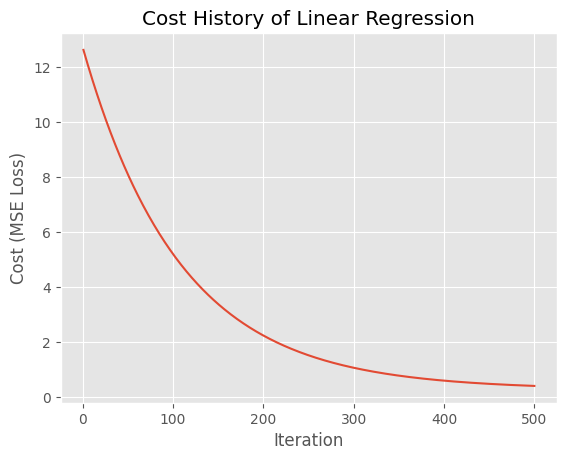

In [6]:
# Skeleton for TODO 3 (continued)
theta = theta_guess.copy()

# 1. Add column of ones to X
X_b = np.c_[X, np.ones((len(X), 1))]

# 2. Run Gradient Descent
# theta, cost_history = ...
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, num_iterations)

# 3. Plot cost history
# ... your code here ...
plt.plot(np.arange(1,num_iterations+1),cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE Loss)")
plt.title("Cost History of Linear Regression")


To have a better understanding of how gradient descent actually works, we build a function that virtualizes the training dynamics for different iterations and learning rates combination.

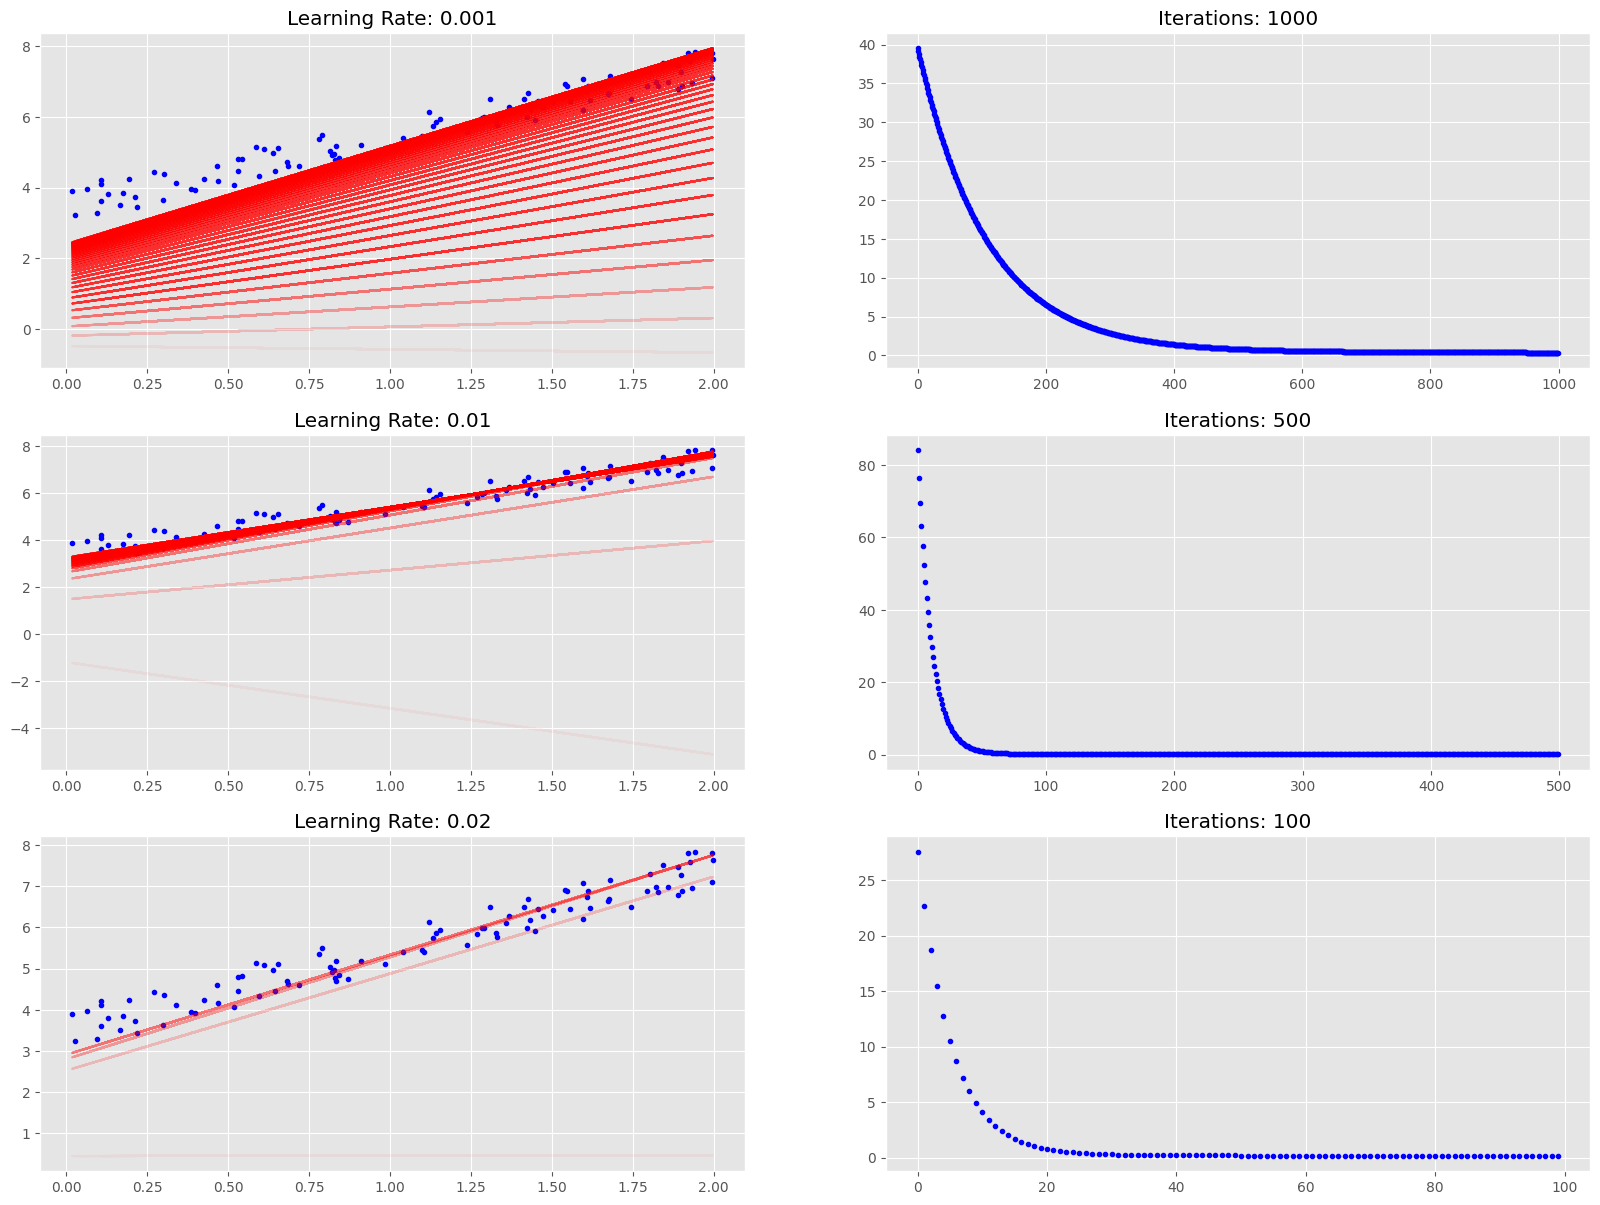

In [7]:
def plot_gradient_descent(
    num_iterations, learning_rate, X_b, y, data_axis, cost_axis=None
):
    """
    Visualize gradient descent optimization for linear regression.

    Parameters:
    - num_iterations (int): Number of iterations for gradient descent.
    - learning_rate (float): Learning rate for gradient descent.
    - X_b (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - data_axis (matplotlib Axis): Axis to visualize the data points and regression lines.
    - cost_axis (matplotlib Axis): Optional axis to visualize the cost history vs. iterations.

    """
    # Plot the data points as blue dots
    data_axis.plot(
        # Assuming the second column is for the intercept term, select the
        # first column.
        X_b[:, 0], y, "b."
    )
    # Initialize random theta values from a standard normal distribution
    theta = np.random.randn(2, 1)

    # Initial transparency value for plotting regression lines
    transparency = 0.05

    # Initialize an array to store cost history during iterations
    cost_history = np.zeros(num_iterations)

    # Loop through each iteration
    for i in range(num_iterations):
        # Compute predictions using the current theta values
        predictions_prev = X_b.dot(theta)

        # Perform one iteration of gradient descent to update theta values
        theta, current_cost = gradient_descent(X_b, y, theta, learning_rate, 1)

        # Compute predictions using the updated theta values
        predictions = X_b.dot(theta)

        # Store the cost value after the current iteration
        cost_history[i] = current_cost[0]

        # Plot the regression line with adjusted transparency
        if i % 25 == 0:
            data_axis.plot(
                X_b[:, 0], predictions, "r-", alpha=transparency
            )  # Assuming the first column is for the intercept term
            if transparency < 0.8:
                transparency += 0.15

    # If provided, plot cost history vs. iterations
    if cost_axis is not None:
        cost_axis.plot(range(num_iterations), cost_history, "b.")


# Create a figure with subplots for visualization
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# List of iteration and learning rate pairs to iterate through
number_of_iteration_learning_rate_pairs = [(1000, 0.001), (500, 0.01), (100, 0.02)]

# Initialize the subplot count for positioning
subplot_count = 0

# Loop through each iteration and learning rate pair
for number_of_iterations, lr in number_of_iteration_learning_rate_pairs:
    # Increment the subplot count and create data and cost axes
    subplot_count += 1
    data_axis = fig.add_subplot(4, 2, subplot_count)
    subplot_count += 1
    cost_axis = fig.add_subplot(4, 2, subplot_count)

    # Set titles for the data and cost axes
    data_axis.set_title("Learning Rate: {}".format(lr))
    cost_axis.set_title("Iterations: {}".format(number_of_iterations))

    # Call the function to visualize gradient descent
    plot_gradient_descent(
        number_of_iterations, lr, X_b, y, data_axis, cost_axis
    )

### **TODO 4:**
In the next cell, write a function to implement Stochastic Gradient Descent (SGD).

1.  Loop `iterations` times.
2.  In each iteration:
    *   Randomly select a single sample index.
    *   Extract `sample_X` and `sample_y` for that index.
    *   Calculate residuals and gradient *for that sample only*.
    *   Update `theta` using the gradient.
    *   Calculate cost (MSE) for that sample and track it.

In [13]:
# Skeleton for TODO 4
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    """
    Perform stochastic gradient descent.
    """
    num_samples = len(y)
    cost_history = []

    for iteration in range(iterations):
        # 1. Select a random sample index
        # ... your code here ...
        random_index = np.random.randint(0, number_of_samples)

        # 2. Get the sample X and y
        # ... your code here ...
        x_sample, y_sample = X[random_index:random_index+1], y[random_index:random_index+1]

        # 3. Calculate residuals
        # ... your code here ...
        prediction, residual = calculate_prediction_residuals(theta, x_sample, y_sample)

        # 4. Calculate gradient
        # ... your code here ...
        gradient = calculate_gradient(x_sample, residual)

        # 5. Update theta
        # ... your code here ...
        theta -= learning_rate*gradient

        # 6. Calculate cost and append to history
        # ... your code here ...
        cost = calculate_cost(theta, X, y)
        cost_history.append(cost)

    return theta, cost_history

Run your SGD implementation and plot the cost vs iteration.

Text(0.5, 1.0, 'Cost History of SGD')

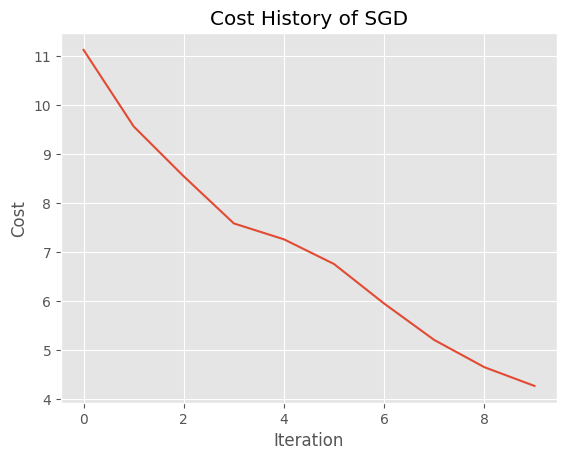

In [30]:
# Skeleton for TODO 4 (continued)
theta = theta_guess.copy()
X_b = np.c_[X, np.ones((len(X), 1))]

# 1. Run Stochastic Gradient Descent
# theta, cost_history = ...
theta, cost_history = stochastic_gradient_descent(X_b, y, theta)

# 2. Plot cost history
# ... your code here ...
plt.plot(np.arange(0,10), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History of SGD")

### **TODO 5:**
In the next cell, implement the SGD with Momentum.

1.  Initialize `velocity` as zeros with same shape as `theta`.
2.   Loop `iterations` times.
3.  Inside loop (similar to SGD):
    *   Random sample.
    *   Calculate gradient.
    *   Update `velocity`:
$v_{new} = \text{momentum} \times v_{old} + (1 - \text{momentum}) \times \text{gradient}$.
    *   Update `theta`:
$\theta = \theta - \alpha \times v_{new}$.
    *   Track cost.

In [34]:
# Skeleton for TODO 5
def stochastic_gradient_descent_with_momentum(X, y, theta, learning_rate=0.01, momentum=0.9, iterations=10):
    """
    Perform SGD with Momentum.
    """
    num_samples = len(y)
    cost_history = []
    velocity = np.zeros_like(theta)

    for iteration in range(iterations):
        # 1. Select a random sample
        # ... your code here ...
        r_idx = np.random.randint(0, len(X))
        x_sample, y_sample = X[r_idx:r_idx+1], y[r_idx:r_idx+1]

        # 2. Calculate gradient
        # ... your code here ...
        prediction = x_sample @ theta
        residual = prediction - y_sample
        residual = residual.reshape(1,1)
        gradient = calculate_gradient(x_sample, residual)


        # 3. Update velocity
        # ... your code here ...
        velocity = momentum * velocity + (1-momentum) * gradient

        # 4. Update theta using velocity
        # ... your code here ...
        theta -= learning_rate*velocity

        # 5. Calculate cost
        # ... your code here ...
        cost = calculate_cost(theta, X, y)
        cost_history.append(cost)

    return theta, cost_history

Call your implementation of SGD with Momentum and plot the Cost vs iteration.

Text(0.5, 1.0, 'Cost History of SGD with momentum')

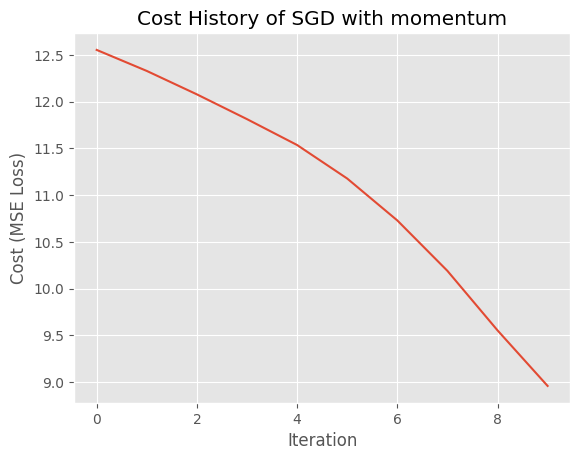

In [33]:
# Skeleton for TODO 5 (continued)
theta = theta_guess.copy()
X_b = np.c_[X, np.ones((len(X), 1))]
momentum = 0.9

# 1. Run SGD with Momentum
# theta, cost_history = ...
theta, cost_history = stochastic_gradient_descent_with_momentum(X_b, y, theta)

# 2. Plot cost history
# ... your code here ...
plt.plot(np.arange(0,10),cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE Loss)")
plt.title("Cost History of SGD with momentum")

### Mini Batch Stochastic Gradient Descent

Mini-batch stochastic gradient descent (MBSGD) is a variation of stochastic gradient descent (SGD) where updates are made using small batches of data instead of single examples.

### **TODO 6:**
Implement `minibatch_gradient_descent` in the next cell.

1.  Loop `iterations` times.
2.  In each iteration:
    *   Select random indices of size `batch_size`.
    *   Construct `X_batch` and `y_batch`.
    *   Calculate residuals and gradient using the batch.
    *   Update `theta` (using learning rate and gradient).
    *   Calculate cost for the batch (or full dataset, but usually batch cost) and track it.

In [54]:
# Skeleton for TODO 6
def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10, batch_size=20):
    """
    Perform Mini-Batch Gradient Descent.
    """
    num_samples = len(y)
    cost_history = []

    for iteration in range(iterations):
        # 1. Select random indices for the batch
        # ... your code here ...
        rand_indices = np.random.randint(0, num_samples, batch_size)

        # 2. Get batch X and y
        # ... your code here ...
        x_batch, y_batch = X[rand_indices], y[rand_indices]

        # 3. Calculate gradient on the batch
        # ... your code here ...
        predictions, residuals = calculate_prediction_residuals(theta, x_batch, y_batch)
        gradient = calculate_gradient(x_batch, residuals)

        # 4. Update theta
        # ... your code here ...
        theta -= learning_rate*gradient

        # 5. Calculate cost
        # ... your code here ...
        cost = calculate_cost(theta, X, y)
        cost_history.append(cost)

    return theta, cost_history

Run your implementation and plot the cost vs iteration.

Text(0.5, 1.0, 'Cost History of batch SGD')

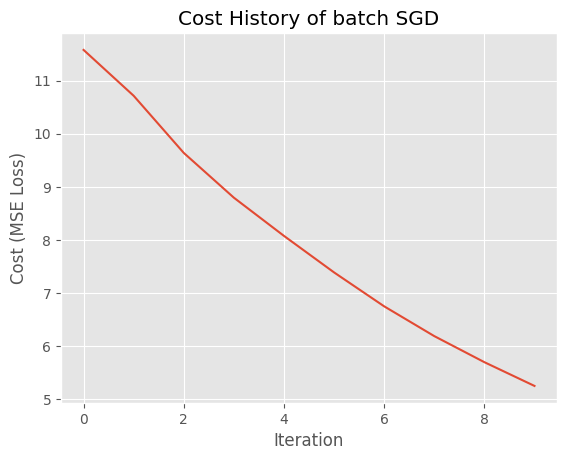

In [55]:
# Skeleton for TODO 6 (continued)
theta = theta_guess.copy()
X_b = np.c_[X, np.ones((len(X), 1))]
batch_size = 10

# 1. Run Mini-batch Gradient Descent
# theta, cost_history = ...
theta, cost_history = minibatch_gradient_descent(X_b, y, theta)

# 2. Plot cost history
# ... your code here ...
plt.plot(np.arange(0,10),cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE Loss)")
plt.title("Cost History of batch SGD")

### **TODO 7:**
Answer the following questions in the next cell.

For these algorithms: GD, SGD, SGD with momentum, MBGD, answer these questions:

1. Assuming the learning rate is the same for all algorithms, what is the worst case runtime complexity of each algorithm. Your answer should be a function of `num_samples`, `num_of_iteration`, and `batch_size`.
2. How would you compare the computation efficiency of each algorithm?
3. How would momentum help with the convergence?
4. How would different learning rate values affect gradient descent algorithms?
5. Does gradient descent always converge to optimum?
6. What are overfitting and underfitting in machine learning? How to reduce overfitting and underfitting? Check this [reference](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/).


Your answer:

1. For GD, the worst case runtime is O(num_samples × num_of_iteration) since each iteration requires computing the gradient over all samples. For SGD and SGD w momentum, it's O(num_of_iteration) since you only use one sample per iteration. For mini-batch gradient descent, it's O(batch_size × num_of_iteration) since you need batch_size samples per iteration.

2. The decreasing order of computational complexity for each algorithm is as follows: GD, MBGD, SGD w momentum = SGD.

3. Momentum gives the algorithm the ability to aggregate the gradient over different samples which would provide directional stability (less noise) while still be as computationally efficient as SGD.

4. Larger learning rates could lead to faster convergence but at the cost of potentially skipping over better optima in highly non convex landscapes and even convex settings as well. Smaller learning rates have a higher likelihood of convergence but also have to run for much longer.

5. For linear regression with squared error loss, the objective is convex so gradient descent with appropriate learning rate will converge to the global optimum, though it may take infinitely many iterations to exactly reach it. However for general non convex problems gradient descent only guarantees convergence to stationary points which could be local minima or saddle points rather than the global optimum. Even for convex problems, if the learning rate is too large or if you use stochastic methods without decaying the learning rate, you may not converge to the exact optimum but instead oscillate around it.

6. Overfitting occurs when the model captures noise in the training data rather than the underlying pattern, leading to low training error but high test error because it doesn't generalize. Underfitting occurs when the model is too simple to capture the underlying structure, resulting in high error on both training and test data. To reduce overfitting you can use regularization like L1 or L2 penalties on weights, collect more training data, use simpler models with fewer parameters, apply early stopping during training, or use techniques like dropout or data augmentation. To reduce underfitting you can use more complex models with higher capacity, add more relevant features, reduce regularization strength, or train longer to ensure the optimization has converged.

### **TODO 8:**
In the next cell write a function to perform linear regression using PyTorch. Check this [reference](https://www.geeksforgeeks.org/linear-regression-using-pytorch/).

1.  Define a `LinearRegressionModel` class inheriting from `nn.Module`.
    *   In `__init__`, define a `nn.Linear` layer.
    *   In `forward`, pass input through the linear layer.
2.  Instantiate the model.
3.  Define the Loss function (`nn.MSELoss`) and Optimizer (`SGD` or `Adam`).
4.  Implement the training loop:
    *   Set model to train mode.
    *   Zero gradients.
    *   Forward pass.
    *   Compute loss.
    *   Backward pass.
    *   Optimizer step.
5.  Return the trained model.

In [56]:
# Skeleton for TODO 8
import torch
import torch.nn as nn
import torch.optim as optim

def train_linear_regression(X, y, optimizer_type='SGD', learning_rate=0.01, num_epochs=1000):
    """
    Train a linear regression model using PyTorch.
    """
    # 1. Define LinearRegressionModel class
    class LinearRegressionModel(nn.Module):
        def __init__(self):
            super(LinearRegressionModel, self).__init__()
            # ... your code here ...
            self.linear = nn.Linear(X_tensor.shape[1], y_tensor.shape[1])

        def forward(self, x):
            # ... your code here ...
            return self.linear(x)

    # 2. Instantiate model
    model = LinearRegressionModel()

    # 3. Define Loss Function (MSE)
    # ... your code here ...
    criterion = nn.MSELoss()

    # 4. Define Optimizer
    # ... your code here ...
    if optimizer_type == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_type == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    else:
        raise ValueError("Optimizer type must be 'SGD' or 'Adam'")

    # 5. Training Loop

    # Set model to train mode
    model.train()
    for epoch in range(num_epochs):

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_tensor)

        # Compute loss
        loss = criterion(outputs, y_tensor)

        # Backward pass
        loss.backward()

        # Optimizer step
        optimizer.step()

    return model

Run your implementation `train_linear_regression`.
Plot the trained line on top of the data plot.
Print your model parameters $\theta$.

/tmp/ipython-input-3539498082.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)
/tmp/ipython-input-3539498082.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y, dtype=torch.float32)


Learned Weight (w): 1.9877800941467285
Learned Bias (b): 1.7578444480895996


Text(0.5, 1.0, 'Linear Regression with PyTorch')

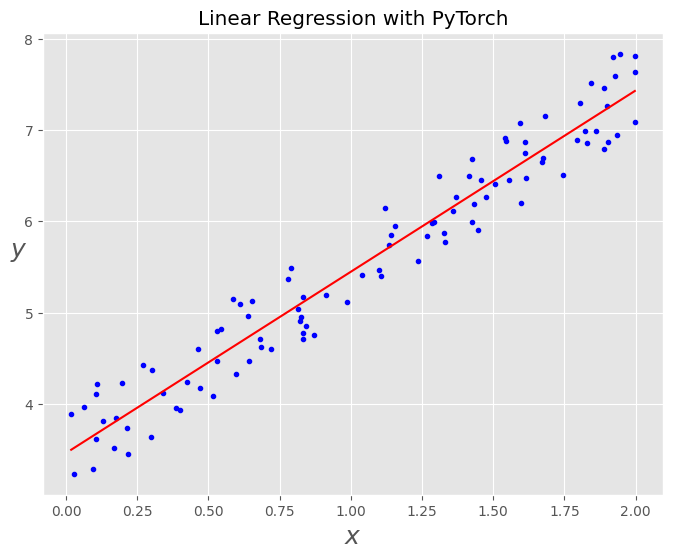

In [63]:
# Skeleton for TODO 8 (continued)

# 1. Convert data to tensors
X_tensor = torch.tensor(X_b, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 2. Train model using train_linear_regression
trained_model = train_linear_regression(X_tensor, y_tensor, optimizer_type='SGD', learning_rate=0.01, num_epochs=1000)

# 3. Print model parameters (weight and bias)

learned_weight = trained_model.linear.weight.data.numpy()
learned_bias = trained_model.linear.bias.data.numpy()

print(f"Learned Weight (w): {learned_weight[0][0]}")
print(f"Learned Bias (b): {learned_bias[0]}")

# 4. Plot Data Points vs Learned Line

plt.figure(figsize=(8, 6))
plt.plot(X, y, 'b.', label='Original Data')



X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_b = np.c_[X_plot, np.ones((len(X_plot), 1))]

predictions_tensor = trained_model(torch.tensor(X_plot_b, dtype=torch.float32))
learned_line_y = predictions_tensor.detach().numpy()

plt.plot(X_plot, learned_line_y, 'r-')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Linear Regression with PyTorch")